# Introduction

In the previous notebook we introduced algorithms as structured recipes for performing tasks. There are often different algorithms for performing the same task. We have seen this for root finding (bisection and Newton's method) and for sorting. We now want to analyse the performance of some algorithms, and in particular understand how the required time (or maybe required memory) changes as the problem size increases. 
This known as *algorithmic complexity*, and it helps us to pick an appropriate algorithm for a given problem, and to determine whether or not an algorithm will be able to solve a problem of a given size within an acceptable time.


## Objectives

- Understand 'big-oh' ($O$) notation
- Appreciate the consequences of algorithmic complexity
- Determine the complexity of some simple algorithms
- Measure complexity experimentally

**NOTE:** This notebook can take some time to execute as it performs timings for a selection of algorithms.

Before starting, we import NumPy and Matplotlib, and configure Matplotlib for the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Complexity and 'big Oh' notation

Consider a problem of size $n$ (if we were sorting an array of numbers, $n$ would be the length of the array).
For many algorithms, when $n$ is large we can express the time cost $t$ as:

$$
t = C g(n)
$$

where $C$ is a constant and $g$ is a function. If the cost can be expressed as above, where $C$ is a constant, then we write in 'big-Oh' notation:

$$
t = O(g(n))
$$

We consider some common expressions for $g(n)$.


## Constant

For an algorithm that is *constant in time*, we have $t = O(1)$. This means that the time required for the algorithm is *independent* of the problem size $n$. An example of an $O(1)$ is accessing an entry in an array.


## Polynomial

For an algorithm that is *polynomial in time*, we have 

$$
t = O(n^k)
$$

where $k \ge 1$ is a constant (it does not have to be an integer). Common cases are:

- $O(n)$: linear complexity
- $O(n^2)$: quadratic complexity
- $O(n^3)$: cubic complexity


## Logarithmic

For an algorithm that is *logarithmic in time*, we have $t = O(\log n)$.


## Loglinear 

A number of important algorithms are *log-linear in time*, that is $t = O(n\log n)$.
(Perhaps the most famous $O(n\log n)$ algorithm is the fast Fourier transform (FFT).)


## Exponential 

Some algorithms are *exponential in time*, that is $t = O(c^{n})$, where $c \ge 1$. Clearly such algorithms
become extremely expensive for large $n$; they are generally of little or no practical use.

## Impact of complexity

To develop a sense of different complexities, below we compute a table of the $g(n)$ terms for common
complexities (study the code if you wish, but it's not required). 
Remember that the required time is proportional to $g(n)$, so we are interested the relative change as we increase $n$. 

In [2]:
import math
N = (10, 100, 1000, 10000, 100000, 1000000)
functions = (("1", lambda n: 1), 
             ("n", lambda n: n/N[0]), 
             ("n**2", lambda n: n**2/N[0]**2), 
             ("n**3", lambda n: n**3/N[0]**3), 
             ("log(n)", lambda n: math.log(n)/math.log(N[0])), 
             ("nlog(n)", lambda n: n*math.log(n)/(N[0]*math.log(N[0]))))


# Create table header
header = "{:<9}| ".format("n")
for f in functions:
    header += "{:<16}".format(f[0])
print(header)

# Print divider
print("-"*len(header))

# Print rows
for n in N:
    row = "{:<9}| ".format(n)
    for f in functions:
        row += "{:<16.4e}".format(f[1](n))
    print(row)

n        | 1               n               n**2            n**3            log(n)          nlog(n)         
-----------------------------------------------------------------------------------------------------------
10       | 1.0000e+00      1.0000e+00      1.0000e+00      1.0000e+00      1.0000e+00      1.0000e+00      
100      | 1.0000e+00      1.0000e+01      1.0000e+02      1.0000e+03      2.0000e+00      2.0000e+01      
1000     | 1.0000e+00      1.0000e+02      1.0000e+04      1.0000e+06      3.0000e+00      3.0000e+02      
10000    | 1.0000e+00      1.0000e+03      1.0000e+06      1.0000e+09      4.0000e+00      4.0000e+03      
100000   | 1.0000e+00      1.0000e+04      1.0000e+08      1.0000e+12      5.0000e+00      5.0000e+04      
1000000  | 1.0000e+00      1.0000e+05      1.0000e+10      1.0000e+15      6.0000e+00      6.0000e+05      


The $g(n)$ terms have been normalised using $g(10)$ so we can compare more easily the different cases.
The table highlights the dramatic increase in cost for the $n^{2}$ and $n^{3}$ cases as $n$ becomes larger. 
Algorithms with lower complexity, e.g. $\log(n)$, $n$ and $n\log(n)$, are much more appealing.

We have discussed complexity in terms of time - how long an algorithm would take to execute - but we could also have discussed complexity in terms of *space* (memory). It can be important to know how the computer memory required by an algorithm will change with problem size.

# Determining complexity

To determine the complexity of an algorithm, we just need to count the number of operations. 
If we have an array `x` of length $n$, and multiply it by a scalar $a$:

In [3]:
n = 100000
x = np.random.rand(n)

a = 10.0
for i in range(n):
    x[i] = a*x[i]

The cost of the operation ` x[i] = a*x[i]` is $O(1)$ and it is performed $n$ times, so overall the cost is $O(n)$.

If we have a $m \times n$ matrix and multiply it by the scalar $a$:

In [4]:
m = 500
n = 1000
A = np.random.rand(m, n)

a = 10.0
for i in range(m):
    for j in range(n):
        A[i, j] = a*A[i, j]

For each `i`, the loop over `j` is executed $n$ times (cost is $O(n)$ for each `i`), and we loop over
`i` $m$ times. Hence this is a $O(mn)$ operation. For a square matrix ($m = n$) the complexity is $O(n^{2})$.

Typical operations on $n \times n$ matrices have complexity that is higher than $O(n)$, so operations on large matrices can be very expensive and algorithms needs to chosen carefully when $n$ is large.

The above examples are straightforward as they do not depend on the data that is stored in the 
vector or matrix - the number of operations depends *only* on the problem size $n$. For other algorithms, 
such as search and sorting, the complexity can depend on the initial data. In these cases, 
when assessing an algorithm we consider:

- Best case complexity
- Worst case complexity
- Average case complexity

When an algorithm is presented, the above complexities are often given together with the conditions under
which each case is met. We will see examples of best and worst case complexities below.

### Cost of operations

We will assume that the cost of operations such addition, subtraction, multiplication and division is $O(1)$, i.e. a constant. You might find in some algorithms books that the cost of an operation depends on the number of digits in an number. This is only necessary for extremely large numbers, beyond what we encounter in normal scientific and engineering applications.

# Search

In the previous notebook we looked at linear and binary search. We now want to consider the complexity
and test it experimentally.


## Linear search

With linear search we iterate over an array looking for a particular value.
If we are lucky, the value we are searching for will be in the first few places the array, in which case the complexity will be $O(1)$ - it does not depend on the array length. If the value is not in the array, we have to check every entry to verify this. The array has $n$ entries, so this has complexity $O(n)$. If the array does contain the value we are looking for, maybe on average it will be in the middle, so we have to perform $n/2$ checks on average. Since we are not interested in the constant term ($1/2$), the complexity for this case 
(average case) is $O(n)$.  This leads us the to the following complexities for linear search:

- Best case: $O(1)$
- Worst case: $O(n)$
- Average case: $O(n)$


## Binary search

Binary search (covered in the previous notebook) has complexity:

- Best case: $O(1)$
- Worst case: $O(\log n)$
- Average case: $O(\log n)$

For large $n$, binary search is *much* faster than linear search.

Despite the differences in complexity, for small problem linear search is faster than binary search. This is because the 'proportionality' constant ($C$) is smaller for linear search. A reason is that modern processors are optimised for moving over data in arrays in sequence - they exploit the processor *cache*, which is small but fast memory that is located on the CPU.

## Comparing search performance

To verify the complexities for linear and binary search, we can test the performance experimentally using the
implementations from the previous notebook. We start with linear search:

In [5]:
def linear_search(x, val):
    "Return True if val is in x, otherwise return False"
    for item in x:
        if item == val:
            return True
    return False

We will test the complexity by searching for a value in arrays of increasing length, and timing how long it takes. We will use the magic function [`%timeit`](Notebook%20tips.ipynb#Detailed-timing) to get the execution time. 

In [6]:
# Create array of problem sizes n we want to test (powers of 2)
N = 2**np.arange(2, 18)

# Generate the array of integers for the largest problem
x = np.arange(N[-1])

# Initialise an empty array to stores times
times = []

# Time the search for each problem size
for n in N:

    # Time search function (repeating 3 times) to find a random integer in x[:n]
    t = %timeit -q -n4 -r1 -o linear_search(x[:n], np.random.randint(0, n))

    # Store best case time
    times.append(t.best)

We now plot the time as a function of problem size, on a log-log scale:

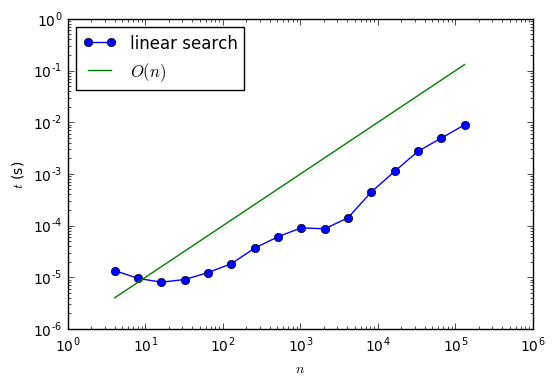

In [7]:
# Plot and label the time taken for linear search
plt.loglog(N, times, marker='o', label='linear search')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Show a reference line of O(n)
plt.loglog(N, 1e-6*N, label='$O(n)$')

# Add legend
plt.legend(loc=0);

As expected, we see that as $n$ increases the time required is proportional to $n$.

We repeat this experiment, but this time for binary search. Here is the search function from the previous notebook:

In [8]:
def binary_search(x, val):
    "Peform binary search on x to find val. If found returns position, otherwise returns None."

    # Intialise end point indices
    lower, upper = 0, len(x) - 1

    # If values is outside of interval, return None 
    if val < x[lower] or val > x[upper]:
        return None

    # Perform binary search
    while True:
                
        # Compute midpoint index (integer division)
        midpoint = (upper + lower)//2

        # Check which side of x[midpoint] val lies, and update midpoint accordingly
        if val < x[midpoint]:
            upper = midpoint - 1
        elif val > x[midpoint]:
            lower = midpoint + 1
        elif val == x[midpoint]:  # found, so return
            return midpoint
       
        # In this case val is not in list (return None)
        if upper < lower:
            return None

Binary sort is much faster than linear search, so we need to test it for larger arrays than we did for linear search.

In [9]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 24)

# Creat array and sort
x = np.arange(N[-1])
x = np.sort(x)

# Initlise an empty array to capture time taken
times = []

# Time search for different problem sizes
for n in N:
    # Time search function for finding '2'
    t = %timeit -q -n5 -r2 -o binary_search(x[:n], 2)

    # Store average
    times.append(t.best)

We expect $O(\log n)$ complexity, so we will use a log scale for $n$ and a linear scale for time $t$:

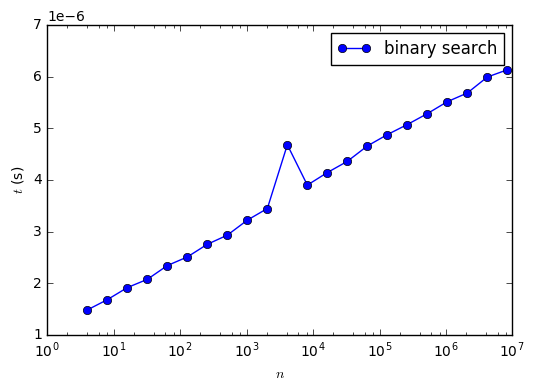

In [10]:
# Plot and label the time taken for binary search
plt.semilogx(N, times, marker='o', label='binary search')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Add legend
plt.legend(loc=0);

# Change format on y-axis to scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));

You should see a line that is close to linear, i.e. binary search is $O(\log(n))$.
Binary sort is so fast that it can be hard to get good timings 
for small problems because noise, caused by things like other processes running on a computer, can be significant.

# Sorting

Suppose we want to sort a random sequence into ascending order. This is a very common and extensively studied problem. There are over 40 sort algorithms listed on [Wikipedia](https://en.wikipedia.org/wiki/Sorting_algorithm). 
Which one do we pick? Let's test bubble sort and quicksort to see how they perform.

## Bubble sort

We introduced bubble sort in the previous notebook. For an array of length $n$, it involves iterating over 
all entries and performing swaps. This has cost $O(n)$. We then repeat this $n$ times. Hence, bubble sort
has complexity $O(n^{2})$.

Below is the bubble sort implementation from the previous notebook:

In [11]:
def bubble_sort(A):
    "Sort A and return"
    A = A.copy()
    n = len(A)
    while n > 0:
        for i in range(n - 1):
            # Swap data if in wrong order
            if A[i] > A[i + 1]:
                A[i + 1], A[i] = A[i], A[i + 1]
        n = n - 1

    return A

We can determine the complexity of bubble sort by inspecting the code.
It involves a *nest* of two loops (a `while` and a `for` loop), and each executed is $n-1$ times. Swapping the data is $O(1)$ (no dependency on $n$), hence the complexity for the whole algorithm is $O(n^{2})$.

Let's time the algorithm for increasingly large arrays. 

In [12]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 10)

# Create an array of random numbers
x = np.random.rand(N[-1])

# Time bubble sort on arrays of different lengths  
times = []
for n in N:
    t = %timeit -q -n2 -r2 -o bubble_sort(x[:n])
    times.append(t.best)

We now plot the bubble sort time against the size of the array on a log-log plot, and compare against a $O(n^{2})$ line:

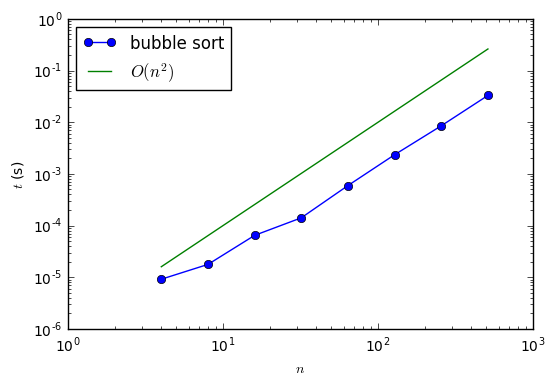

In [13]:
# Plot bubble sort timing
plt.loglog(N, times, marker='o', label='bubble sort')

# Show reference line of O(n^{2})
plt.loglog(N, 1e-6*N**2, label='$O(n^2)$')

# Add labels and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0);

It is clear that for bubble sort that $t \propto n^2$ -  we are observing the $O(n^2)$ complexity. 
This makes bubble sort too expensive for large $n$ to be of practical use.

## Quicksort

Analysing the complexity of quicksort is not as simple at the preceding algorithms, so we will state it and test
it experimentally. Quicksort has complexities:

- Best case: $O(n\log n)$
- Worst case: $O(n^{2})$
- Average case: $O(n\log n)$

The worst case complexity occurs when the data is already sorted. 

We reproduce here the quicksort algorithm from the previous notebook so we can test its complexity.

In [14]:
def quicksort(A, lo=0, hi=None):
    "Sort A and return sorted array"

    # Initialise data the first time function is called    
    if hi is None:
        hi = len(A) - 1
        A = A.copy()

    # Sort    
    if lo < hi:
        p = partition(A, lo,  hi)
        quicksort(A, lo, p - 1)
        quicksort(A, p + 1, hi)
    return A


def partition(A, lo, hi):
    "Partitioning function for use in quicksort"
    pivot = A[hi]
    i = lo
    for j in range(lo,  hi):
        if A[j] <= pivot:
            A[i], A[j] = A[j], A[i]
            i += 1
    A[i], A[hi] = A[hi], A[i]
    return i

We gather timings for quicksort to sort an array of random numbers:

In [15]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 14)

# Create an array of random numbers
x = np.random.rand(N[-1])

# Time quicksort on arrays of different lengths
times = []
for n in N:
    t = %timeit -n1 -r1 -o -q quicksort(x[:n])
    times.append(t.best)

Plotting the results, wtih a $O(n\log(n))$ line as a reference:

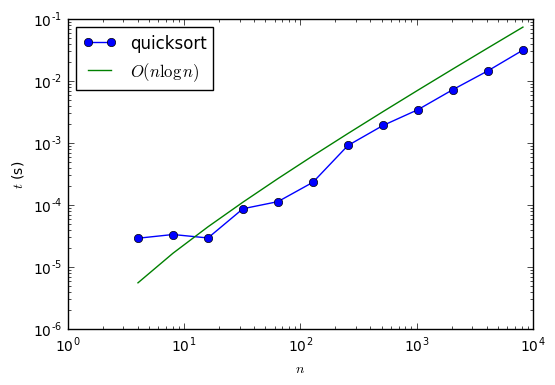

In [16]:
# Plot quicksort timings
plt.loglog(N, times, marker='o', label='quicksort')

# Show reference line of O(n*log(n))
plt.loglog(N, 1e-6*N*np.log(N), label='$O(n\log\, n)$')

# Add labels
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0);

We observe here the $O(n\log n)$ complexity.

### Worst case complexity

We can reproduce the quicksort worst-case complexity, which is $O(n^{2})$, by pre-sorting an array. Since an $O(n^{2})$ algorithm will be much more expensive than $O(n\log(n))$ for large $n$, we will test for smaller problems:

In [17]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)

# Create array of random numbers and pre-sort
x = np.random.rand(N[-1])
x = np.sort(x)

# Quicksort is recursive, but by deafult Python raises an exeption if the number
# of recursions is high (to avoid crashes due to accidental infinite recursion loops),
# so we need to increase the limit
import sys
sys.setrecursionlimit(25000)

times = []
for n in N:
    t = %timeit -n1 -r1 -o -q quicksort(x[:n])
    times.append(t.best)

Plotting the timing results:

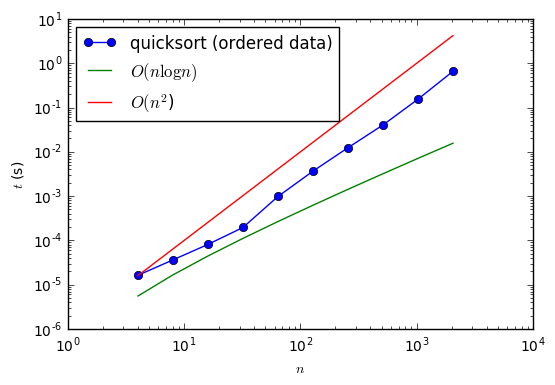

In [18]:
# Plot quicksort timings
plt.loglog(N, times, marker='o', label='quicksort (ordered data)')

# Plot nlog(n) line for reference
plt.loglog(N, 1e-6*N*np.log(N), label='$O(n\log n)$')

# Show reference line of O(n^{2})
plt.loglog(N, 1e-6*N**2, label='$O(n^2$)')

# Add labels
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0);

As expected, we observe $O(n^{2})$ complexity for the pre-sorted case - we have reproduced the worst-case scenario.

## Library sort implementations

It is interesting to see how library (built-in) sorting implementations compare to our implementation.
The built-in Python function `sorted` is an implementation of Timsort (https://en.wikipedia.org/wiki/Timsort).
We compare the performance of `sorted` and `numpy.sort` (using quicksort) to our quicksort implementation:

In [19]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 14)
 
# Create an array of random numbers, and make read-only so we don't accidentally sort it    
x = np.random.rand(N[-1])
x.flags.writeable = False

# Time the different implementations
our_times = []
py_times = []
np_times = []
for n in N:
    # Time our quicksort implememtation
    t = %timeit -n3 -q -o quicksort(x[:n])
    our_times.append(t.best)
    
    # Time Python built-in sort
    t = %timeit -n3 -q -o sorted(x[:n])
    py_times.append(t.best)

    t = %timeit -n3 -q -o np.sort(x[:n], kind='quicksort')
    np_times.append(t.best)

We now plot the results:

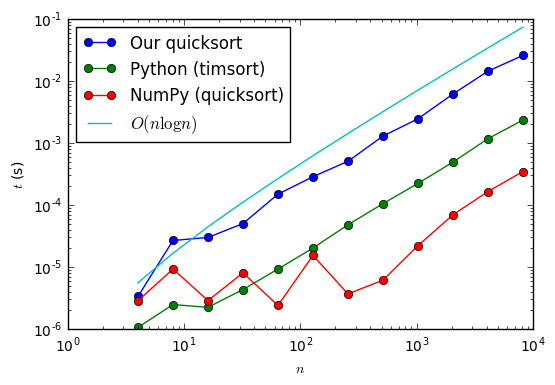

In [20]:
# Plot time taken for quicksort of our implementation
plt.loglog(N, our_times, marker='o', label='Our quicksort')

# Plot time taken for built-in sort
plt.loglog(N, py_times, marker='o', label='Python (timsort)')
plt.loglog(N, np_times, marker='o', label='NumPy (quicksort)')

# Show reference line of O(n*log(n))
plt.loglog(N, 1e-6*N*np.log(N), label=r'$O(n\log n)$')

# Show legend
plt.legend(loc=0);

# Add label and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)');

We can see that all three implementations have $O(n\log(n))$ complexity, but there are large differences in speed (keep in mind the log scale). Our implementation is by far the slowest!

Repeating this test on sorted data:

In [21]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)
 
# Create an array of random numbers and sort    
x = np.random.rand(N[-1])
x.sort()

# Time the different implementations
our_times = []
py_times = []
np_times = []
for n in N:
    # Time our quicksort implememtation
    t = %timeit -n3 -q -o quicksort(x[:n])
    our_times.append(t.best)
    
    # Time Python built-in sort
    t = %timeit -n3 -q -o sorted(x[:n])
    py_times.append(t.best)

    t = %timeit -n3 -q -o np.sort(x[:n], kind='quicksort')
    np_times.append(t.best)

Plotting the times:

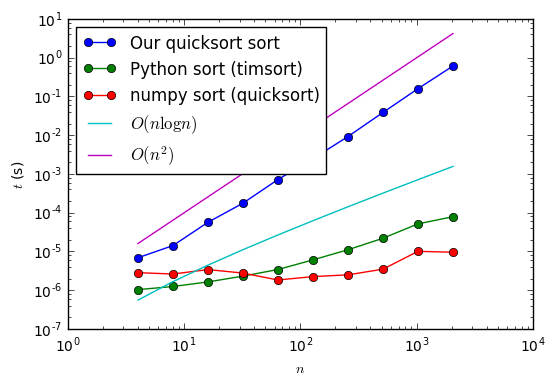

In [22]:
# Plot time taken for quicksort of our implementation
plt.loglog(N, our_times, marker='o', label='Our quicksort sort')

# Plot time taken for built-in quicksort
plt.loglog(N, py_times, marker='o', label='Python sort (timsort)')
plt.loglog(N, np_times, marker='o', label='numpy sort (quicksort)')

# Show reference line of O(n*log(n)) and O(n)
plt.loglog(N, 1.0e-7*N*np.log(N), label=r'$O(n \log n)$')
plt.loglog(N, 1.0e-6*N**2, label=r'$O(n^2)$')

# Add labels and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0);

Note that our implementation exhibits $O(n^2)$ complexity, while the NumPy quicksort implementation is
$O(n\log(n))$. Quality implementations have heuristics to avoid the worst-case complexity.
Timsort has worst-case complexity of $O(n\log n)$.

# Summary

Complexity is important as it tells how the cost of an algorithm will increase as problem size increases. For large problems, it is important to select and/or develop algorithms with low complexity.

We have focused on complexity time, but remember there is also *space complexity*, which is how the required memory changes with problem size. If you have a device with limited memory, you might favour an algorithm with low space complexity.

# Exercises

## Exercise 11.1

Determine by operating counting the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$. (This is a reasoning exercise - you do not need to write a program.)


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [23]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [24]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime. Use a log-log scale for
your plot.